In [1]:
from dlsr import *
from tensorflow import keras

helpers.config(True)

In [2]:
# general
image_size = 96
batch_size = 16
epochs = 500

# generator 
gen_n1 = 1e-4
gen_n2 = 1e-5

# discriminator
dis_n1 = 1e-4
dis_n2 = 1e-5

In [3]:
# setup training data
training_data = helpers.get_training_data(
    image_size=image_size, batch_size=batch_size, repeat_count=20
)

925390592/925390592 [==============================] - 25s 0us/step


In [4]:
# instantiate models
discriminator = models.discriminator(image_size=image_size)
generator = keras.models.load_model(
    "./results/saved-models/srres2x.h5",
)
srgan = models.SRGAN(discriminator=discriminator, generator=generator)

# instantiate losses
generator_loss = losses.PerceptualLoss(discriminator=discriminator, image_size=image_size)
discriminator_loss = keras.losses.BinaryCrossentropy(from_logits=False)

# create a history object
history = helpers.History([
    "d_loss",
    "g_loss",
    "val_d_loss",
    "val_g_loss",
    "d_accuracy",
    "g_accuracy",
    "val_d_accuracy",
    "val_g_accuracy",
])

In [5]:
# pass 1
train_gan(
    srgan=srgan,
    training_data=training_data,
    epochs=epochs//2,
    batch_size=batch_size,
    generator_loss_fn=generator_loss,
    generator_n=gen_n1,
    discriminator_loss_fn=discriminator_loss,
    discriminator_n=dis_n1,
    history=history,
)

Epoch 1/250
1000/1000 [==============================] - 206s 180ms/step - d_loss: 0.6682 - g_loss: 0.0153 - g_accuracy: 0.8704 - d_accuracy: 0.5898 - val_d_loss: 0.6394 - val_g_loss: 0.0121 - val_g_accuracy: 0.8577 - val_d_accuracy: 0.6100
Epoch 2/250
1000/1000 [==============================] - 179s 179ms/step - d_loss: 0.6672 - g_loss: 0.0147 - g_accuracy: 0.8900 - d_accuracy: 0.5760 - val_d_loss: 0.6980 - val_g_loss: 0.0120 - val_g_accuracy: 0.8742 - val_d_accuracy: 0.4750
Epoch 3/250
1000/1000 [==============================] - 178s 178ms/step - d_loss: 0.6859 - g_loss: 0.0142 - g_accuracy: 0.8866 - d_accuracy: 0.5541 - val_d_loss: 0.6431 - val_g_loss: 0.0090 - val_g_accuracy: 0.8944 - val_d_accuracy: 0.5950
Epoch 4/250
1000/1000 [==============================] - 178s 178ms/step - d_loss: 0.6765 - g_loss: 0.0140 - g_accuracy: 0.8862 - d_accuracy: 0.5545 - val_d_loss: 0.7283 - val_g_loss: 0.0118 - val_g_accuracy: 0.8903 - val_d_accuracy: 0.4700
Epoch 5/250
1000/1000 [=============

In [6]:
# pass 2
train_gan(
    srgan=srgan,
    training_data=training_data,
    epochs=epochs//2,
    batch_size=batch_size,
    generator_loss_fn=generator_loss,
    generator_n=gen_n2,
    discriminator_loss_fn=discriminator_loss,
    discriminator_n=dis_n2,
    history=history,
)

Epoch 1/250
1000/1000 [==============================] - 189s 176ms/step - d_loss: 0.2357 - g_loss: 0.0136 - g_accuracy: 0.9366 - d_accuracy: 0.9050 - val_d_loss: 0.0329 - val_g_loss: 0.0135 - val_g_accuracy: 0.9247 - val_d_accuracy: 0.9000
Epoch 2/250
1000/1000 [==============================] - 175s 175ms/step - d_loss: 0.2236 - g_loss: 0.0136 - g_accuracy: 0.9335 - d_accuracy: 0.9084 - val_d_loss: 0.6316 - val_g_loss: 0.0121 - val_g_accuracy: 0.9366 - val_d_accuracy: 0.8750
Epoch 3/250
1000/1000 [==============================] - 175s 175ms/step - d_loss: 0.2200 - g_loss: 0.0137 - g_accuracy: 0.9322 - d_accuracy: 0.9101 - val_d_loss: 0.0376 - val_g_loss: 0.0135 - val_g_accuracy: 0.9173 - val_d_accuracy: 0.9000
Epoch 4/250
1000/1000 [==============================] - 175s 175ms/step - d_loss: 0.2335 - g_loss: 0.0138 - g_accuracy: 0.9326 - d_accuracy: 0.9026 - val_d_loss: 0.0639 - val_g_loss: 0.0163 - val_g_accuracy: 0.9273 - val_d_accuracy: 0.9000
Epoch 5/250
1000/1000 [=============

In [7]:
architecture = generator.to_json()
with open("./results/saved-models/srgan2x/architecture.json", "w") as f:
    f.write(architecture)
generator.save_weights("./results/saved-models/srgan2x/generator.h5")

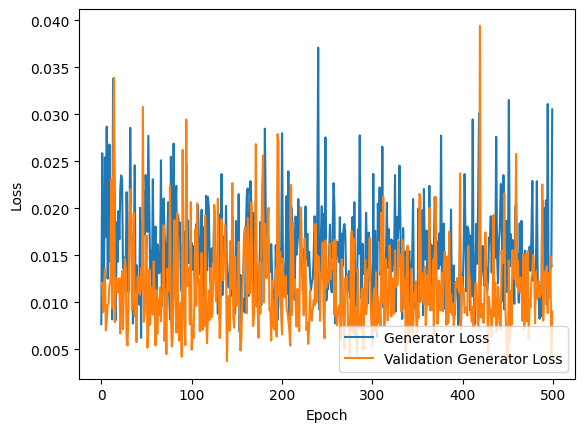

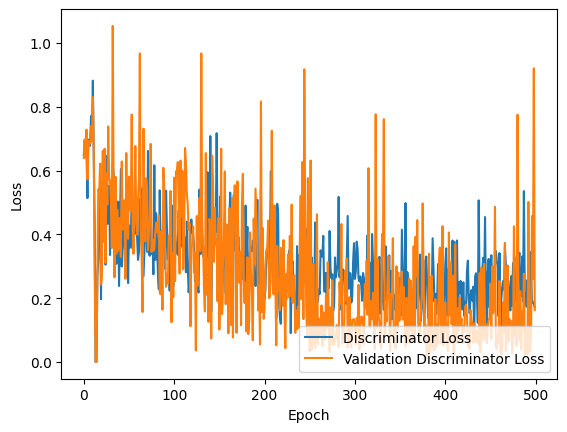

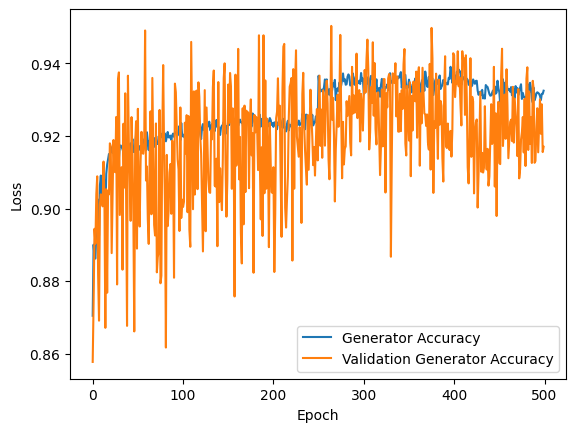

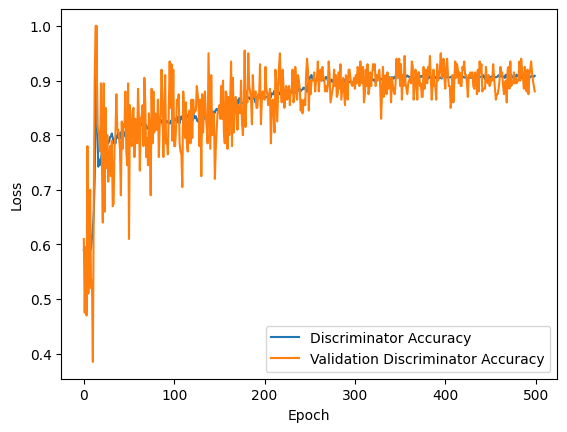

In [8]:
history.plot({
    "g_loss": "Generator Loss",
    "val_g_loss": "Validation Generator Loss"
})
history.plot({
    "d_loss": "Discriminator Loss",
    "val_d_loss": "Validation Discriminator Loss"
})
history.plot({
    "g_accuracy": "Generator Accuracy",
    "val_g_accuracy": "Validation Generator Accuracy"
})
history.plot({
    "d_accuracy": "Discriminator Accuracy",
    "val_d_accuracy": "Validation Discriminator Accuracy"
})